In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

# 1.Download the Dataset and Understand the Format (10 Points)

# 2.Generate the Data Matrix and the Label vector (10 Points)

In [88]:
path = os.path.abspath(os.curdir)
path

'C:\\Users\\SourcesNet'

In [89]:
#from google.colab import drive
#drive.mount('/content/drive')

In [90]:
x_features = []
y_labels = []
path  = "E:\year3_term2\pattern_recognition\Assigments\Assigment1"

folder_path = path + '\pca_lda_dataset'

def import_data(folder_path):
    for i in tqdm(os.listdir(folder_path)) :
        class_path = folder_path + '/' + i
        for j in os.listdir(class_path) :
            img = plt.imread(os.path.join(class_path, j))
            x_features.append(img)
            y_labels.append(i)
    return x_features, y_labels
        
    
x_features, y_labels = import_data(folder_path)

100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:05<00:00,  6.82it/s]


In [91]:
x_features[0]

array([[48, 49, 45, ..., 56, 56, 54],
       [45, 52, 39, ..., 52, 50, 51],
       [45, 50, 42, ..., 48, 53, 50],
       ...,
       [50, 48, 50, ..., 45, 46, 46],
       [45, 54, 49, ..., 46, 47, 47],
       [51, 51, 51, ..., 47, 46, 46]], dtype=uint8)

s1


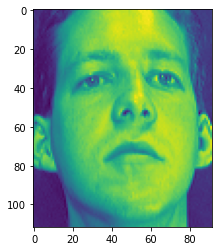

In [92]:
plt.imshow(x_features[9])
print(y_labels[9])

In [93]:
x_features[0].shape

(112, 92)

In [94]:
type(x_features[0])

numpy.ndarray

In [95]:
z = x_features[0].reshape(-1)
z

array([48, 49, 45, ..., 47, 46, 46], dtype=uint8)

### a.Convert every image into a vector of 10304 values corresponding to the image size.
### b.Stack the 400 vectorsinto a single Data Matrix D and generate the label vector y.The labels are integers from 1:40 corresponding to the subject id.

In [96]:
def flatten_images(x_features):
    for i in range(len(x_features)) :
        x_features[i] = x_features[i].reshape(-1) # we can use .ravel() also
    return x_features

x_features = flatten_images(x_features)

In [97]:
x_features[0].shape

(10304,)

In [98]:
len(x_features)

400

## 3.Split the Dataset into Training and Test sets (10 Points)
### a.From the Data Matrix D400x10304 keep the odd rows for training and the even rows for testing. 
### This will give you 5 instances per person for training and 5 instancesper person for testing.
### b.Split the labels vector accordingly.

In [99]:
def encode_labels(y_labels):
    le = LabelEncoder()
    y_label_coded = le.fit_transform(y_labels)
    return y_label_coded, le
    
y_label_coded, le = encode_labels(y_labels)
y_label_coded

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [100]:
def split_data_even_odd(x_features, y_label_coded):
    x_train = []
    y_train = []
    x_test = []
    y_test = []
    for i in range(len(x_features)) :
        if i % 2 != 0 :
            x_train.append(x_features[i])
            y_train.append(y_label_coded[i])
        else :
            x_test.append(x_features[i])
            y_test.append(y_label_coded[i])
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = split_data_even_odd(x_features, y_label_coded)

In [101]:
len(x_train)
print(x_test[0] == x_features[0])
print(x_test[60] == x_features[120])
print(y_test[0] == y_label_coded[0])
print(y_test[60] == y_label_coded[120])

[ True  True  True ...  True  True  True]
[ True  True  True ...  True  True  True]
True
True


# 4.Classification using PCA(30 points)
### a.Use the pseudo code below for computing the projection matrix U. Define thealpha= {0.8,0.85,0.9,0.95}
### b.Project the training set, andtest sets separately using the same projection matrix.

In [102]:
def get_eigens_and_meanVector(x_train): #must be numpy matrix
    #compute mean
    mean_vector = x_train.mean(axis = 0)
    #center_data
    x_train_cen = x_train - mean_vector
    #compute covariance
    cov = 1 / len(x_train_cen) * (np.dot(x_train_cen.T, x_train_cen))
    #compute eigen vals and eigen vec
    eig_val, eig_vec = np.linalg.eigh(cov)
    return eig_val, eig_vec, mean_vector

In [103]:
def get_proj_mat(eig_val, eig_vec, alpha):
    #fraction of total variance
    fraction = []
    eig_sum=0
    eig_val_rev = eig_val[::-1]
    eig_vec_rev = eig_vec[::-1]

    for i in eig_val_rev :
        eig_sum += i
        fraction.append(eig_sum/eig_val_rev.sum())
    fraction = np.array(fraction)
    #choose dimensionality
    fraction_trimed = fraction > alpha
    smallest_ind = 0
    for i in range(len(fraction_trimed)) :
        if fraction_trimed[i] == True :
            smallest_ind = i
            break;
    #reduced basis
    proj_mat = eig_vec_rev[:smallest_ind+1]
    return proj_mat

In [104]:
def center_data(x_train, x_test, mean_vector):
    return x_train-mean_vector, x_test-mean_vector

In [105]:
def get_projected_mat(x_train, x_test, proj_mat):
    x_train_proj = np.dot(x_train, proj_mat.T)
    #x_test_cen = x_test- x_train_proj.mean(axis=1)
    x_test_proj = np.dot(x_test, proj_mat.T)
    return x_train_proj, x_test_proj

### c.Use a simple classifier (first Nearest Neighbor to determine the class labels).
### d.Report Accuracy for every value of alpha separately.

In [106]:
def classify_KNN(x_train_proj, y_train, x_test_proj, y_test, alpha, neighbors=1):
    knn = KNN(n_neighbors = neighbors)
    knn.fit(x_train_proj, y_train)
    y_pred = knn.predict(x_test_proj)
    print("accuracy of alpha",alpha,"and neighbours =", neighbors,"is", accuracy_score(y_pred, y_test))
    print("precision of alpha",alpha,"and neighbours =", neighbors,"is", precision_score(y_pred, y_test, average = 'weighted'))
    print("recall of alpha",alpha,"and neighbours =", neighbors,"is", recall_score(y_pred, y_test, average = 'macro'))
    print("f1 score of alpha",alpha,"and neighbours =", neighbors,"is", f1_score(y_pred, y_test, average = 'weighted'))

In [107]:
x_train = np.matrix(x_train)
x_test = np.matrix(x_test)
y_train = np.array(y_train).reshape(200,1)
y_test = np.array(y_test).reshape(200,1)
eig_val, eig_vec, mean_vector = get_eigens_and_meanVector(x_train)

In [108]:
import time
alphas = [0.8, 0.85, 0.9, 0.95]
for alpha in alphas:
    proj_mat = get_proj_mat(eig_val, eig_vec, alpha)
    x_train_cen, x_test_cen = center_data(x_train, x_test, mean_vector)
    x_train_proj, x_test_proj = get_projected_mat(x_train_cen, x_test_cen, proj_mat)
    classify_KNN(x_train_proj, y_train, x_test_proj, y_test, alpha, neighbors = 1)
    print("________________________________________________________")

C:\Users\SourcesNet\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\SourcesNet\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\SourcesNet\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\SourcesNet\anaconda3\lib\site-packages\sklearn\utils\validation.py:

accuracy of alpha 0.8 and neighbours = 1 is 0.87
precision of alpha 0.8 and neighbours = 1 is 0.907
recall of alpha 0.8 and neighbours = 1 is 0.8921428571428572
f1 score of alpha 0.8 and neighbours = 1 is 0.8764500777000777
________________________________________________________
accuracy of alpha 0.85 and neighbours = 1 is 0.915
precision of alpha 0.85 and neighbours = 1 is 0.9490000000000001
recall of alpha 0.85 and neighbours = 1 is 0.9386507936507936
f1 score of alpha 0.85 and neighbours = 1 is 0.9191901154401154
________________________________________________________
accuracy of alpha 0.9 and neighbours = 1 is 0.92
precision of alpha 0.9 and neighbours = 1 is 0.9620000000000001
recall of alpha 0.9 and neighbours = 1 is 0.9440476190476191
f1 score of alpha 0.9 and neighbours = 1 is 0.9256060606060607
________________________________________________________
accuracy of alpha 0.95 and neighbours = 1 is 0.945
precision of alpha 0.95 and neighbours = 1 is 0.966
recall of alpha 0.95 an

C:\Users\SourcesNet\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\SourcesNet\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\SourcesNet\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\SourcesNet\anaconda3\lib\site-packages\sklearn\utils\validation.py:

In [109]:
#pca total time
first = time.time()
x_train = np.matrix(x_train)
x_test = np.matrix(x_test)
y_train = np.array(y_train).reshape(200,1)
y_test = np.array(y_test).reshape(200,1)
eig_val, eig_vec, mean_vector = get_eigens_and_meanVector(x_train)
proj_mat = get_proj_mat(eig_val, eig_vec, alpha)
x_train_cen, x_test_cen = center_data(x_train, x_test, mean_vector)
x_train_proj, x_test_proj = get_projected_mat(x_train_cen, x_test_cen, proj_mat)
classify_KNN(x_train_proj, y_train, x_test_proj, y_test, alpha, neighbors = 1)
last = time.time()
print("Total Time For a pca algorithm :", round(last-first, 2))

accuracy of alpha 0.95 and neighbours = 1 is 0.945
precision of alpha 0.95 and neighbours = 1 is 0.966
recall of alpha 0.95 and neighbours = 1 is 0.9577380952380953
f1 score of alpha 0.95 and neighbours = 1 is 0.9481890331890331
Total Time For a pca algorithm : 135.5


C:\Users\SourcesNet\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\SourcesNet\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\SourcesNet\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [110]:
import time
neigbours = [1,3,5,7]
for k in neigbours:
    first = time.time()
    proj_mat = get_proj_mat(eig_val, eig_vec, alpha)
    x_train_cen, x_test_cen = center_data(x_train, x_test, mean_vector)
    x_train_proj, x_test_proj = get_projected_mat(x_train_cen, x_test_cen, proj_mat)
    classify_KNN(x_train_proj, y_train, x_test_proj, y_test, 0.95, neighbors = k)
    last = time.time()
    print("Time taken :", round(last-first, 2))
    print("________________________________________________________")

C:\Users\SourcesNet\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\SourcesNet\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\SourcesNet\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\SourcesNet\anaconda3\lib\site-packages\sklearn\utils\validation.py:

accuracy of alpha 0.95 and neighbours = 1 is 0.945
precision of alpha 0.95 and neighbours = 1 is 0.966
recall of alpha 0.95 and neighbours = 1 is 0.9577380952380953
f1 score of alpha 0.95 and neighbours = 1 is 0.9481890331890331
Time taken : 0.13
________________________________________________________
accuracy of alpha 0.95 and neighbours = 3 is 0.83
precision of alpha 0.95 and neighbours = 3 is 0.902
recall of alpha 0.95 and neighbours = 3 is 0.8371825396825396
f1 score of alpha 0.95 and neighbours = 3 is 0.8463834776334775
Time taken : 0.13
________________________________________________________
accuracy of alpha 0.95 and neighbours = 5 is 0.78
precision of alpha 0.95 and neighbours = 5 is 0.862
recall of alpha 0.95 and neighbours = 5 is 0.8066964285714286
f1 score of alpha 0.95 and neighbours = 5 is 0.7947716172716173
Time taken : 0.12
________________________________________________________
accuracy of alpha 0.95 and neighbours = 7 is 0.735
precision of alpha 0.95 and neighbours 

C:\Users\SourcesNet\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\SourcesNet\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\SourcesNet\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\SourcesNet\anaconda3\lib\site-packages\sklearn\metrics\_classificat

### e.Can you find a relation between alpha and classification accuracy?

### From the results it's obvious that by increasing the alpha the accuracy of the model increases
#### This happens because the percentage of data loss from our data decrease so the accuracy of the model increases
#### i.e. when increasing the alpha the new dims (eigen vectors) become more and more representative for the data

# 5. Classification Using LDA (30 Points)

---




## 1. Use the pseudo code below for LDA. 

In [111]:
y_train = np.asarray(y_train)
x_train = np.asarray(x_train)
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)
uniqueClasses = np.unique(y_train)
print(uniqueClasses)
print(x_train)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
[[ 34  34  33 ...  37  40  33]
 [ 39  44  53 ...  29  26  29]
 [ 64  76  80 ...  35  37  39]
 ...
 [110 109 111 ...  94  88  90]
 [112 109 116 ...  93  88  92]
 [110 112 113 ...  92  87  90]]


Calculate the mean vector for every class Mu1,Mu2,...,Mu40.

In [112]:
meanVectors = []
eachClassIndices = []
for i in tqdm(range(len(uniqueClasses))):
    indices = np.where(y_train == uniqueClasses[i])
    array = np.asarray(x_train[indices[0], :])
    meanVectors.append(np.mean(array, axis=0))
    eachClassIndices.append( indices[0])

meanVectors = np.asarray(meanVectors)
print(meanVectors.shape)

100%|████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 2161.54it/s]

(40, 10304)




Calculate the mean vector for every class Mu1, Mu2, ..., Mu40.

In [113]:
overAllMean = np.mean(x_train, axis=0)
print(overAllMean)
print(overAllMean.shape)

[86.265 86.365 86.795 ... 77.35  77.915 78.24 ]
(10304,)


Replace $ \ B $ matrix by $ \ S_{b} $.
   
   $$ \ S_{b} = \sum_{k=1}^{m}n_k (\mu_k - \mu)(\mu_k-\mu)^T $$

Here, m is the number of classes, μ is the overall sample mean, and $\ n_{k} $ is the
number of samples in the k-th class.


In [114]:
sb = np.zeros([10304,10304])
nk = len(eachClassIndices[0])
for i in range(len(uniqueClasses)):
    centered = np.asmatrix(meanVectors[i] - overAllMean)
    sb += (nk * np.matmul(centered.T , centered) ) 

print(sb)

[[229647.755 229781.255 225540.865 ... -18199.55  -22264.895 -18137.32 ]
 [229781.255 230657.555 226154.165 ... -18978.15  -23072.795 -18861.12 ]
 [225540.865 226154.165 222227.795 ... -19050.65  -22795.485 -18884.76 ]
 ...
 [-18199.55  -18978.15  -19050.65  ... 310058.7   313472.75  311491.6  ]
 [-22264.895 -23072.795 -22795.485 ... 313472.75  321528.355 317164.88 ]
 [-18137.32  -18861.12  -18884.76  ... 311491.6   317164.88  319319.68 ]]


Calculating $ \ S $ matrix

In [115]:
s = np.zeros([10304,10304])
for j in tqdm(range(len(eachClassIndices))):
    D = np.asarray(x_train[eachClassIndices[j], :])
    z = np.asarray(D) - meanVectors[j]
    s += np.matmul(z.T , z)

print(s)

100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:32<00:00,  1.22it/s]

[[24423.2 23833.4 23526.  ...  -964.  -1262.6 -2064.4]
 [23833.4 25988.8 24427.8 ... -1819.4 -3178.  -2968.4]
 [23526.  24427.8 26166.8 ...  -158.  -2224.  -4336.4]
 ...
 [ -964.  -1819.4  -158.  ... 91074.8 63122.2 37822.6]
 [-1262.6 -3178.  -2224.  ... 63122.2 77461.2 54698.2]
 [-2064.4 -2968.4 -4336.4 ... 37822.6 54698.2 81746.8]]


Calculating $ \  S^{-1} $

In [116]:
s = np.asmatrix(s)
sInv = np.linalg.inv(s)

Calculating eignValues and eignVectors $  of \ S^{-1} B $

## using eigh

### save eignvalues and eignvectors

In [117]:
eignValues, eignVectors = np.linalg.eigh(np.matmul(sInv, sb))

In [118]:
print(eignValues)
print("**************")
print(eignVectors)

[-7.01567570e+20 -2.00994956e+20 -1.18226897e+20 ...  1.18114563e+20
  1.97650185e+20  7.01660348e+20]
**************
[[ 0.02150925  0.02204438 -0.02281367 ...  0.02553848 -0.02304674
  -0.02145887]
 [ 0.02234138  0.02313296 -0.02417979 ...  0.02576545 -0.02348757
  -0.02210486]
 [ 0.02199795  0.02324774 -0.02477634 ...  0.02388297 -0.02224273
  -0.02140109]
 ...
 [-0.00319912  0.00281312  0.00338959 ...  0.00337926  0.00277901
  -0.00319034]
 [-0.00154751  0.00149569  0.00186916 ...  0.00191189  0.00149009
  -0.00154482]
 [-0.00810983  0.00742226  0.00904088 ...  0.00910705  0.00735207
  -0.00809   ]]


In [119]:
kval = eignValues
kvec = eignVectors

In [120]:
eignValues = kval
eignVectors = kvec
print(eignVectors[0])

[[ 0.02150925  0.02204438 -0.02281367 ...  0.02553848 -0.02304674
  -0.02145887]]


### Continue 
Use 39 dominant eigenvectors instead of just one. You will have a projection matrix  $ \ U_{39x10304} $


Sorting Eigen vectors based on Eigen values

In [121]:
idx = np.asmatrix(eignValues.argsort())
idx = np.flip(idx)

eignValues = eignValues[idx]
eignVectors = eignVectors[idx,:].reshape(10304, 10304).T

Get The projection matrix using the 39 dominant eigen vectors

In [122]:
projectionMatrix  = np.asmatrix(eignVectors[0:39,:])
print(projectionMatrix)

[[-0.00810983 -0.00154751 -0.00319912 ...  0.02199795  0.02234138
   0.02150925]
 [ 0.00742226  0.00149569  0.00281312 ...  0.02324774  0.02313296
   0.02204438]
 [ 0.00904088  0.00186916  0.00338959 ... -0.02477634 -0.02417979
  -0.02281367]
 ...
 [-0.0048701  -0.0022284  -0.00019067 ...  0.10010447  0.06446461
   0.04688048]
 [-0.00920374 -0.00302004 -0.00191476 ... -0.03364482 -0.02142214
  -0.01541161]
 [ 0.00019236  0.00209313 -0.00255678 ...  0.08150615  0.05160125
   0.03696525]]


## 2. Projection
Project the training set, and test sets separately using the same projection matrix U. You will have 39 dimensions in the new space.


In [123]:
print(projectionMatrix.shape)
print(x_train.shape)
x_trainProj = np.matmul(projectionMatrix, x_train.T).T
x_testProj = np.matmul(projectionMatrix, x_test.T).T
print(x_trainProj.shape)

(39, 10304)
(200, 10304)
(200, 39)


## 3. Use a simple classifier 
(first Nearest Neighbor to determine the class
labels).


In [124]:
neighbours = [1,3,5,7]
def LDATuning():
    for i in neighbours:
        knn = KNN(n_neighbors = i)
        knn.fit(np.asarray(x_trainProj), y_train.ravel())
        y_pred = knn.predict(np.asarray(x_testProj))
        print("accuracy for nerigbour",i,"is",accuracy_score(y_pred, y_test.ravel()))

In [125]:
LDATuning()

accuracy for nerigbour 1 is 0.93
accuracy for nerigbour 3 is 0.85
accuracy for nerigbour 5 is 0.775
accuracy for nerigbour 7 is 0.745


In [126]:
first = time.time()
knn = KNN(n_neighbors = i)
y_train = np.asarray(y_train)
x_train = np.asarray(x_train)
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)
uniqueClasses = np.unique(y_train)

meanVectors = []
eachClassIndices = []
for i in tqdm(range(len(uniqueClasses))):
    indices = np.where(y_train == uniqueClasses[i])
    array = np.asarray(x_train[indices[0], :])
    meanVectors.append(np.mean(array, axis=0))
    eachClassIndices.append( indices[0])

meanVectors = np.asarray(meanVectors)
overAllMean = np.mean(x_train, axis=0)
sb = np.zeros([10304,10304])
nk = len(eachClassIndices[0])

for i in tqdm(range(len(uniqueClasses))):
    centered = np.asmatrix(meanVectors[i] - overAllMean)
    sb += (nk * np.matmul(centered.T , centered) ) 
s = np.zeros([10304,10304])


for j in tqdm(range(len(eachClassIndices))):
    D = np.asarray(x_train[eachClassIndices[j], :])
    z = np.asarray(D) - meanVectors[j]
    s += np.matmul(z.T , z)
s = np.asmatrix(s)
sInv = np.linalg.inv(s)
eignValues, eignVectors = np.linalg.eigh(np.matmul(sInv, sb))
idx = np.asmatrix(eignValues.argsort())
idx = np.flip(idx)
eignValues = eignValues[idx]
eignVectors = eignVectors[idx,:].reshape(10304, 10304).T
projectionMatrix  = np.asmatrix(eignVectors[0:39,:])
x_trainProj = np.matmul(projectionMatrix, x_train.T).T
x_testProj = np.matmul(projectionMatrix, x_test.T).T
knn.fit(np.asarray(x_trainProj), y_train.ravel())
y_pred = knn.predict(np.asarray(x_testProj))
last = time.time()
print("Total Time For a lda algorithm :", round(last-first, 2))

100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:33<00:00,  1.21it/s]


Total Time For a lda algorithm : 371.57


# 7. Compare vs Non-Face Images (15 Points)

---



## Download non-face images and make them of the same size 92x112

In [127]:
from PIL import Image
new_width = 92
new_height = 112
non_face_features = []

non_face_images_path = path +'\\non-face_images'

def import_non_face_images_resized(non_face_images_path):
    for i in tqdm(os.listdir(non_face_images_path)) :
        class_path = non_face_images_path + '/' + i
        for j in os.listdir(class_path) :
            image_path = os.path.join(class_path, j)            
            # image = Image.open(image_path).convert('L')
            # resized_image = image.resize((new_width, new_height))
            # resized_image.save(image_path)
            img = plt.imread(image_path)
            non_face_features.append(img)
    return non_face_features
        
    
non_face_features = import_non_face_images_resized(non_face_images_path)
# reshape the images to be of size 10304
non_face_features = flatten_images(non_face_features[:100])
non_face_features = np.asarray(non_face_features)

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:04<00:00,  1.63it/s]


In [128]:
# Join the faces with the non faces images into one array
def join_faces_with_non_faces(number_of_non_face_images):
    D = np.concatenate((np.array(non_face_features[ : number_of_non_face_images, :]), x_features), axis = 0)
    D_labels = np.concatenate((np.zeros((number_of_non_face_images, 1)), np.ones((400, 1))), axis=0)
    return D, D_labels

In [129]:
def convert_to_numpy_arrays(D_train, D_test, D_labels_train, D_labels_test):
    D_train = np.asarray(D_train)
    D_labels_train = np.asarray(D_labels_train)
    D_test = np.asarray(D_test)
    D_labels_test = np.asarray(D_labels_test)
    new_unique_classes = np.unique(D_labels_train)
    return D_train, D_labels_train, D_test, D_labels_test, new_unique_classes

In [130]:
def find_mean_vector(D_train, D_labels_train, new_unique_classes):
    new_mean_vectors = []
    new_each_class_indices = []
    for i in range(len(new_unique_classes)):
        indices = np.where(D_labels_train == new_unique_classes[i])
        array = np.asarray(D_train[indices[0], :])
        new_mean_vectors.append(np.mean(array, axis=0))
        new_each_class_indices.append( indices[0])
    new_mean_vectors = np.asarray(new_mean_vectors)
    return new_mean_vectors, new_each_class_indices

In [131]:
def calc_eigen_values_and_eigen_vectors(new_each_class_indices, new_unique_classes, new_mean_vectors, new_over_all_mean):
    new_sb = np.zeros([10304,10304])
    new_nk = len(new_each_class_indices[0])
    for i in range(len(new_unique_classes)):
        centered = np.asmatrix(new_mean_vectors[i] - new_over_all_mean)
        new_sb += (new_nk * np.matmul(centered.T , centered) )
    new_s = np.zeros([10304,10304])
    for j in range(len(new_each_class_indices)):
        D_temp = np.asarray(D_train[new_each_class_indices[j], :])
        z = np.asarray(D_temp) - new_mean_vectors[j]
        new_s += np.matmul(z.T , z)
    new_s = np.asmatrix(new_s)
    new_sInv = np.linalg.inv(new_s)
    new_eignValues, new_eignVectors = np.linalg.eigh(np.matmul(new_sInv, new_sb))
    new_idx = np.asmatrix(new_eignValues.argsort())
    new_idx = np.flip(new_idx)

    new_eignValues = new_eignValues[new_idx]
    new_eignVectors = new_eignVectors[new_idx,:].reshape(10304, 10304).T
    return new_eignVectors

In [132]:
new_neighbours = [1,3,5,7]
def new_LDATuning(D_train, D_test, index_of_last_dominant_eigen_vector, new_eignVectors):
    new_projectionMatrix  = np.asmatrix(new_eignVectors[0:index_of_last_dominant_eigen_vector,:])
    D_trainProj = np.matmul(new_projectionMatrix, D_train.T).T
    D_testProj = np.matmul(new_projectionMatrix, D_test.T).T
    knn = KNN(n_neighbors = 1)
    knn.fit(np.asarray(D_trainProj), D_labels_train.ravel())
    D_labels_pred = knn.predict(np.asarray(D_testProj))
    accuracy = accuracy_score(D_labels_pred, D_labels_test.ravel())
    precision = precision_score(D_labels_pred, D_labels_test.ravel(), average = 'weighted')
    recall = recall_score(D_labels_pred, D_labels_test.ravel(), average = 'weighted')
    f1 = f1_score(D_labels_pred, D_labels_test.ravel(), average = 'weighted')
    return accuracy, precision, recall, f1

# Plot the accuracy vs the number of non-faces images while fixing the number of face images.

In [133]:
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

for i in tqdm(range(50, 401, 50)):
    D, D_labels = join_faces_with_non_faces(i)
    # Split the data even and odd
    D_train, D_test, D_labels_train, D_labels_test = split_data_even_odd(D, D_labels)
    D_train, D_labels_train, D_test, D_labels_test, new_unique_classes = convert_to_numpy_arrays(D_train, D_test, D_labels_train, D_labels_test)
    new_mean_vectors, new_each_class_indices = find_mean_vector(D_train, D_labels_train, new_unique_classes)
    new_over_all_mean = np.mean(D_train, axis=0)
    new_eignVectors = calc_eigen_values_and_eigen_vectors(new_each_class_indices, new_unique_classes, new_mean_vectors, new_over_all_mean)
    accuracy, precision, recall, f1 = new_LDATuning(D_train, D_test, 39, new_eignVectors)
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    print("Accuracy: ", accuracy)

 12%|██████████▍                                                                        | 1/8 [04:35<32:11, 275.94s/it]

Accuracy:  0.9466666666666667


 25%|████████████████████▊                                                              | 2/8 [08:27<24:58, 249.82s/it]

Accuracy:  0.9


 38%|███████████████████████████████▏                                                   | 3/8 [12:09<19:45, 237.08s/it]

Accuracy:  0.9


 50%|█████████████████████████████████████████▌                                         | 4/8 [15:37<15:02, 225.66s/it]

Accuracy:  0.892


 62%|███████████████████████████████████████████████████▉                               | 5/8 [19:19<11:12, 224.31s/it]

Accuracy:  0.904


 75%|██████████████████████████████████████████████████████████████▎                    | 6/8 [23:08<07:31, 225.90s/it]

Accuracy:  0.916


 88%|████████████████████████████████████████████████████████████████████████▋          | 7/8 [26:52<03:45, 225.39s/it]

Accuracy:  0.948


100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [30:29<00:00, 228.66s/it]

Accuracy:  0.956


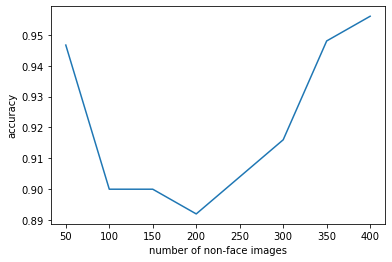

In [134]:
plt.figure()
plt.plot(np.arange(50, 401, 50), accuracy_list)
plt.xlabel('number of non-face images')
plt.ylabel('accuracy')
plt.show()

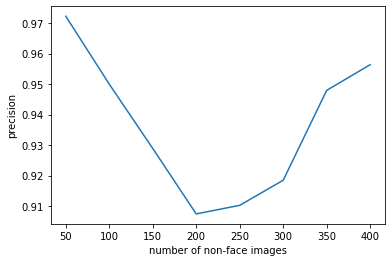

In [135]:
plt.figure()
plt.plot(np.arange(50, 401, 50), precision_list)
plt.xlabel('number of non-face images')
plt.ylabel('precision')
plt.show()

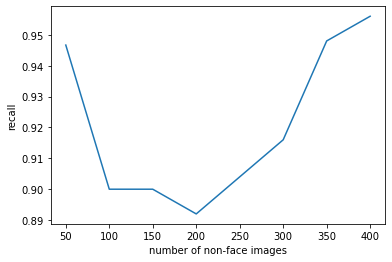

In [136]:
plt.figure()
plt.plot(np.arange(50, 401, 50), recall_list)
plt.xlabel('number of non-face images')
plt.ylabel('recall')
plt.show()

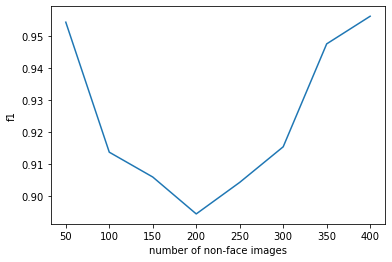

In [137]:
plt.figure()
plt.plot(np.arange(50, 401, 50), f1_list)
plt.xlabel('number of non-face images')
plt.ylabel('f1')
plt.show()

#  Criticize the accuracy measure for large numbers of non-faces images in the training data.

As we saw from the plot, the accuracy decreases when we increase the size of the non-face images whlile fixing the number of face images.

In [138]:
# Use 39 dominant eigen vectors
D, D_labels = join_faces_with_non_faces(400)
# Split the data even and odd
D_train, D_test, D_labels_train, D_labels_test = split_data_even_odd(D, D_labels)
D_train, D_labels_train, D_test, D_labels_test, new_unique_classes = convert_to_numpy_arrays(D_train, D_test, D_labels_train, D_labels_test)
new_mean_vectors, new_each_class_indices = find_mean_vector(D_train, D_labels_train, new_unique_classes)
new_over_all_mean = np.mean(D_train, axis=0)
new_eignVectors = calc_eigen_values_and_eigen_vectors(new_each_class_indices, new_unique_classes, new_mean_vectors, new_over_all_mean)
new_neighbours = [1,3,5,7]
new_projectionMatrix  = np.asmatrix(new_eignVectors[0:10,:])
D_trainProj = np.matmul(new_projectionMatrix, D_train.T).T
D_testProj = np.matmul(new_projectionMatrix, D_test.T).T
for i in new_neighbours:
    knn = KNN(n_neighbors = i)
    knn.fit(np.asarray(D_trainProj), D_labels_train.ravel())
    D_labels_pred = knn.predict(np.asarray(D_testProj))
    print("accuracy of neighbours =", i,"is", accuracy_score(D_labels_pred, D_labels_test.ravel()))
    print("precision of neighbours =", i,"is", precision_score(D_labels_pred, D_labels_test.ravel(), average = 'weighted'))
    print("recall of neighbours =", i,"is", recall_score(D_labels_pred, D_labels_test.ravel(), average = 'weighted'))
    print("f1 score of neighbours =", i,"is", f1_score(D_labels_pred, D_labels_test.ravel(), average = 'weighted'))
    success_case_found, failure_case_found = False, False
    for i in range(len(D_testProj)):
        if success_case_found and failure_case_found:
            break
        if not success_case_found and D_labels_pred[i] == D_labels_test[i]:
            success_case_found = True
            print("Success case: ")
            print("Actual Classification:", D_labels_test[i])
            print("Pred Classification:", D_labels_pred[i])
        if not failure_case_found and D_labels_pred[i] != D_labels_test[i]:
            failure_case_found = True
            print("Failure case: ")
            print("Actual Classification:", D_labels_test[i])
            print("Pred Classification:", D_labels_pred[i])
    print('-' * 100)        

accuracy of neighbours = 1 is 0.924
precision of neighbours = 1 is 0.9223999999999999
recall of neighbours = 1 is 0.924
f1 score of neighbours = 1 is 0.9226714888487039
Success case: 
Actual Classification: [0.]
Pred Classification: 0.0
Failure case: 
Actual Classification: [0.]
Pred Classification: 1.0
----------------------------------------------------------------------------------------------------
accuracy of neighbours = 3 is 0.896
precision of neighbours = 3 is 0.896
recall of neighbours = 3 is 0.896
f1 score of neighbours = 3 is 0.896
Success case: 
Actual Classification: [0.]
Pred Classification: 0.0
Failure case: 
Actual Classification: [0.]
Pred Classification: 1.0
----------------------------------------------------------------------------------------------------
accuracy of neighbours = 5 is 0.888
precision of neighbours = 5 is 0.89216
recall of neighbours = 5 is 0.888
f1 score of neighbours = 5 is 0.8897788778877889
Success case: 
Actual Classification: [0.]
Pred Classifi

# Bonus

In [139]:
def split_data_seventy_thirty(x_features, y_label_coded):
    x_train = []
    y_train = []
    x_test = []
    y_test = []
    number_of_test_data = 400 * 0.3
    for i in range(len(x_features)):
        if i % 2 == 0 and number_of_test_data:
            number_of_test_data -= 1
            x_test.append(x_features[i])
            y_test.append(y_label_coded[i])
        else:            
            x_train.append(x_features[i])
            y_train.append(y_label_coded[i])
    return x_train, x_test, y_train, y_test

x_train_2, x_test_2, y_train_2, y_test_2 = split_data_seventy_thirty(x_features, y_label_coded)

# PCA

In [140]:
x_train_2 = np.matrix(x_train_2)
x_test_2 = np.matrix(x_test_2)
y_train_2 = np.array(y_train_2).reshape(280,1)
y_test_2 = np.array(y_test_2).reshape(120,1)
eig_val_2, eig_vec_2, mean_vector_2 = get_eigens_and_meanVector(x_train_2)

In [141]:
alphas = [0.8, 0.85, 0.9, 0.95]
for alpha in alphas:
    proj_mat_2 = get_proj_mat(eig_val_2, eig_vec_2, alpha)
    #x_train_cen, x_test_cen = center_data(x_train, x_test, mean_vector)
    x_train_proj_2, x_test_proj_2 = get_projected_mat(x_train_2, x_test_2, proj_mat_2)
    classify_KNN(x_train_proj_2, y_train_2, x_test_proj_2, y_test_2, alpha, neighbors = 1)
    print("________________________________________________________")
    

C:\Users\SourcesNet\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\SourcesNet\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\SourcesNet\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\SourcesNet\anaconda3\lib\site-packages\sklearn\metrics\_classificat

accuracy of alpha 0.8 and neighbours = 1 is 0.825
precision of alpha 0.8 and neighbours = 1 is 0.7883333333333333
recall of alpha 0.8 and neighbours = 1 is 0.729416282642089
f1 score of alpha 0.8 and neighbours = 1 is 0.7936357623857623
________________________________________________________
accuracy of alpha 0.85 and neighbours = 1 is 0.8333333333333334
precision of alpha 0.85 and neighbours = 1 is 0.8433333333333334
recall of alpha 0.85 and neighbours = 1 is 0.7768707482993198
f1 score of alpha 0.85 and neighbours = 1 is 0.8228475228475228
________________________________________________________
accuracy of alpha 0.9 and neighbours = 1 is 0.9166666666666666
precision of alpha 0.9 and neighbours = 1 is 0.92
recall of alpha 0.9 and neighbours = 1 is 0.8728937728937729
f1 score of alpha 0.9 and neighbours = 1 is 0.9108164983164982
________________________________________________________
accuracy of alpha 0.95 and neighbours = 1 is 0.925
precision of alpha 0.95 and neighbours = 1 is 0.9

C:\Users\SourcesNet\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\SourcesNet\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\SourcesNet\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\SourcesNet\anaconda3\lib\site-packages\sklearn\metrics\_classificat

# LDA

In [142]:
y_train_2 = np.asarray(y_train_2)
x_train_2 = np.asarray(x_train_2)
x_test_2 = np.asarray(x_test_2)
y_test_2 = np.asarray(y_test_2)
uniqueClasses_2 = np.unique(y_train_2)

meanVectors_2 = []
eachClassIndices_2 = []
for i in range(len(uniqueClasses_2)):
    indices = np.where(y_train_2 == uniqueClasses_2[i])
    array = np.asarray(x_train_2[indices[0], :])
    meanVectors_2.append(np.mean(array, axis=0))
    eachClassIndices_2.append( indices[0])

meanVectors_2 = np.asarray(meanVectors_2)
overAllMean_2 = np.mean(x_train_2, axis=0)

sb_2 = np.zeros([10304,10304])
nk_2 = len(eachClassIndices_2[0])
for i in range(len(uniqueClasses_2)):
    centered = np.asmatrix(meanVectors_2[i] - overAllMean_2)
    sb_2 += (nk_2 * np.matmul(centered.T , centered) ) 

s_2 = np.zeros([10304,10304])
for j in range(len(eachClassIndices_2)):
    D = np.asarray(x_train_2[eachClassIndices_2[j], :])
    z = np.asarray(D) - meanVectors_2[j]
    s_2 += np.matmul(z.T , z)

s_2 = np.asmatrix(s_2)
sInv_2 = np.linalg.inv(s_2)
eignValues_2, eignVectors_2 = np.linalg.eigh(np.matmul(sInv_2, sb_2))
idx_2 = np.asmatrix(eignValues_2.argsort())
idx_2 = np.flip(idx_2)

eignValues_2 = eignValues_2[idx_2]
eignVectors_2 = eignVectors_2[idx_2,:].reshape(10304, 10304).T

projectionMatrix_2  = np.asmatrix(eignVectors_2[0:39,:])
x_trainProj_2 = np.matmul(projectionMatrix_2, x_train_2.T).T
x_testProj_2 = np.matmul(projectionMatrix_2, x_test_2.T).T

for i in neighbours:
    knn = KNN(n_neighbors = i)
    knn.fit(np.asarray(x_trainProj_2), y_train_2.ravel())
    y_pred_2 = knn.predict(np.asarray(x_testProj_2))
    print(accuracy_score(y_pred_2, y_test_2.ravel()))

0.9583333333333334
0.875
0.875
0.825


# Variations of PCA & LDA

In [143]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import time

X_train_p, X_test, y_train_pca, y_test_pca = train_test_split(x_features, y_labels, test_size=0.3, random_state=42)

first = time.time()
pca = PCA(n_components=39)
X_train_pca = pca.fit_transform(X_train_p)
clf = LogisticRegression(random_state=42)
clf.fit(X_train_pca, y_train_pca)
X_test_pca = pca.transform(X_test)
y_pred_pca = clf.predict(X_test_pca)
second = time.time()
print("Time taken : ", round(second-first,2))

print("Accuracy:", accuracy_score(y_test_pca, y_pred_pca))
print("Precision:", precision_score(y_test_pca, y_pred_pca, average = 'weighted'))
print("Recall:", recall_score(y_test_pca, y_pred_pca, average = 'weighted'))
print("F1 score:", f1_score(y_test_pca, y_pred_pca, average = 'weighted'))


Time taken :  0.63
Accuracy: 0.9333333333333333
Precision: 0.9635416666666666
Recall: 0.9333333333333333
F1 score: 0.9348290598290598


C:\Users\SourcesNet\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\SourcesNet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [144]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# split the data into training and test sets
X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split(x_features, y_labels, test_size=0.3, random_state=42)

first = time.time()
# create an LDA object and fit the training data
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X_train_lda, y_train_lda)

# predict the classes of the test set
y_pred_lda = lda.predict(X_test_lda)
second = time.time()
print("Time taken : ",round(second-first,2))

# evaluate the accuracy of the LDA model
accuracy = accuracy_score(y_test_lda, y_pred_lda)
print("Accuracy:", accuracy)


Time taken :  0.58
Accuracy: 0.9333333333333333


# Draft

## using eig and getting the real part of complex numbers only

In [145]:
eignValues, eignVectors = np.linalg.eig(np.dot(sInv, sb))

In [146]:
print(eignValues)
print("**************")
print(eignVectors)

[-6.49582204e+17+3.81774511e+17j -6.49582204e+17-3.81774511e+17j
  9.66269036e+15+5.70150302e+16j ...  2.73416490e+01+0.00000000e+00j
  1.52653488e+01+0.00000000e+00j -2.60882351e+01+0.00000000e+00j]
**************
[[-0.12204786+0.00000000e+00j -0.12204786-0.00000000e+00j
  -0.12572849+0.00000000e+00j ...  0.00852776+0.00000000e+00j
   0.01358879+0.00000000e+00j  0.00129165+0.00000000e+00j]
 [ 0.00902823+3.42349572e-03j  0.00902823-3.42349572e-03j
  -0.03929549+1.04539445e-02j ...  0.00040074+0.00000000e+00j
   0.00156623+0.00000000e+00j -0.00038236+0.00000000e+00j]
 [ 0.10704476-9.21207819e-03j  0.10704476+9.21207819e-03j
   0.09045662+4.33728074e-02j ... -0.0007398 +0.00000000e+00j
  -0.00696018+0.00000000e+00j -0.01289119+0.00000000e+00j]
 ...
 [-0.00334285+7.87466116e-05j -0.00334285-7.87466116e-05j
  -0.00978177-3.50599619e-03j ... -0.02198462+0.00000000e+00j
  -0.01343237+0.00000000e+00j -0.00319062+0.00000000e+00j]
 [-0.00117557+3.54218940e-04j -0.00117557-3.54218940e-04j
  -0.0

In [147]:
eigen_values_dec = eignValues.real
eigen_values_dec
eigen_vectors_dec = eignVectors.real
eigen_vectors_dec

matrix([[-0.12204786, -0.12204786, -0.12572849, ...,  0.00852776,
          0.01358879,  0.00129165],
        [ 0.00902823,  0.00902823, -0.03929549, ...,  0.00040074,
          0.00156623, -0.00038236],
        [ 0.10704476,  0.10704476,  0.09045662, ..., -0.0007398 ,
         -0.00696018, -0.01289119],
        ...,
        [-0.00334285, -0.00334285, -0.00978177, ..., -0.02198462,
         -0.01343237, -0.00319062],
        [-0.00117557, -0.00117557, -0.00259569, ..., -0.00495857,
         -0.00329603, -0.00455868],
        [-0.00719617, -0.00719617, -0.01660931, ..., -0.00419477,
         -0.00476981, -0.00623471]])

In [148]:
kval = eigen_values_dec
kvec = eigen_vectors_dec

In [149]:
eignValues = kval
eignVectors = kvec
print(eignVectors[0])

[[-0.12204786 -0.12204786 -0.12572849 ...  0.00852776  0.01358879
   0.00129165]]


In [150]:
eignValues = eignValues.reshape(-1)
eignValues

array([-6.49582204e+17, -6.49582204e+17,  9.66269036e+15, ...,
        2.73416490e+01,  1.52653488e+01, -2.60882351e+01])

In [151]:
idx = np.argsort(abs(eignValues))[::-1]
eignValues = eignValues[idx]
eignVectors = eignVectors[idx]
print(eignValues)
print(eignVectors)

[-6.49582204e+17 -6.49582204e+17  4.59666459e+16 ...  5.08861339e-01
  2.81693732e-01  2.81693732e-01]
[[-0.12204786 -0.12204786 -0.12572849 ...  0.00852776  0.01358879
   0.00129165]
 [ 0.00902823  0.00902823 -0.03929549 ...  0.00040074  0.00156623
  -0.00038236]
 [ 0.06238739  0.06238739  0.09610846 ... -0.00871778 -0.00498457
  -0.00480688]
 ...
 [ 0.01769729  0.01769729  0.00614139 ...  0.00812954  0.00833581
   0.0024737 ]
 [-0.00317696 -0.00317696 -0.00528764 ... -0.00031295  0.00586158
   0.00167525]
 [-0.01023811 -0.01023811 -0.01050375 ... -0.00020984  0.00579916
  -0.00750734]]


In [152]:
#idx = np.asmatrix(eignValues.argsort())
#idx = np.flip(idx)

#eignValues = eignValues[0][idx]
#eignVectors = eignVectors[idx,:].reshape(10304, 10304).T
# print(eignValues)
# print(eignVectors)

In [153]:
projectionMatrix  = np.asmatrix(eignVectors[0:39,:])
print(projectionMatrix)

[[-0.12204786 -0.12204786 -0.12572849 ...  0.00852776  0.01358879
   0.00129165]
 [ 0.00902823  0.00902823 -0.03929549 ...  0.00040074  0.00156623
  -0.00038236]
 [ 0.06238739  0.06238739  0.09610846 ... -0.00871778 -0.00498457
  -0.00480688]
 ...
 [-0.01119675 -0.01119675 -0.02252343 ...  0.0065748   0.01804273
   0.00556801]
 [ 0.00766515  0.00766515 -0.00525766 ...  0.00828633  0.01041488
   0.00107562]
 [-0.02538003 -0.02538003 -0.02242755 ... -0.00100818 -0.00555115
   0.00762975]]


In [154]:
print(projectionMatrix.shape)
print(x_train.shape)
x_trainProj = np.matmul(projectionMatrix, x_train.T).T
x_testProj = np.matmul(projectionMatrix, x_test.T).T
print(x_trainProj.shape)

(39, 10304)
(200, 10304)
(200, 39)


In [155]:
neighbours = [1,3,5,7]
def LDATuning():
    for i in neighbours:
        knn = KNN(n_neighbors = i)
        knn.fit(np.asarray(x_trainProj), y_train.ravel())
        y_pred = knn.predict(np.asarray(x_testProj))
        print(accuracy_score(y_pred, y_test.ravel()))

In [156]:
LDATuning()

0.875
0.785
0.72
0.69


## Another approach of getting magnitude of complex numbers

In [157]:
eignValues2, eignVectors2 = np.linalg.eig(np.dot(sInv, sb))

In [158]:
print(eignValues2)
print(eignVectors2)

[-6.49582204e+17+3.81774511e+17j -6.49582204e+17-3.81774511e+17j
  9.66269036e+15+5.70150302e+16j ...  2.73416490e+01+0.00000000e+00j
  1.52653488e+01+0.00000000e+00j -2.60882351e+01+0.00000000e+00j]
[[-0.12204786+0.00000000e+00j -0.12204786-0.00000000e+00j
  -0.12572849+0.00000000e+00j ...  0.00852776+0.00000000e+00j
   0.01358879+0.00000000e+00j  0.00129165+0.00000000e+00j]
 [ 0.00902823+3.42349572e-03j  0.00902823-3.42349572e-03j
  -0.03929549+1.04539445e-02j ...  0.00040074+0.00000000e+00j
   0.00156623+0.00000000e+00j -0.00038236+0.00000000e+00j]
 [ 0.10704476-9.21207819e-03j  0.10704476+9.21207819e-03j
   0.09045662+4.33728074e-02j ... -0.0007398 +0.00000000e+00j
  -0.00696018+0.00000000e+00j -0.01289119+0.00000000e+00j]
 ...
 [-0.00334285+7.87466116e-05j -0.00334285-7.87466116e-05j
  -0.00978177-3.50599619e-03j ... -0.02198462+0.00000000e+00j
  -0.01343237+0.00000000e+00j -0.00319062+0.00000000e+00j]
 [-0.00117557+3.54218940e-04j -0.00117557-3.54218940e-04j
  -0.00259569+7.05647

In [159]:
eigen_values_dec = np.abs(eignValues2)
eigen_values_dec
eigen_vectors_dec = np.abs(eignVectors2)
eigen_vectors_dec

matrix([[0.12204786, 0.12204786, 0.12572849, ..., 0.00852776, 0.01358879,
         0.00129165],
        [0.00965553, 0.00965553, 0.04066228, ..., 0.00040074, 0.00156623,
         0.00038236],
        [0.10744042, 0.10744042, 0.1003175 , ..., 0.0007398 , 0.00696018,
         0.01289119],
        ...,
        [0.00334378, 0.00334378, 0.01039111, ..., 0.02198462, 0.01343237,
         0.00319062],
        [0.00122778, 0.00122778, 0.00751874, ..., 0.00495857, 0.00329603,
         0.00455868],
        [0.00726927, 0.00726927, 0.01850717, ..., 0.00419477, 0.00476981,
         0.00623471]])

In [160]:
kval = eigen_values_dec
kvec = eigen_vectors_dec
kval = kval.reshape(-1)
kval

array([7.53464543e+17, 7.53464543e+17, 5.78280317e+16, ...,
       2.73416490e+01, 1.52653488e+01, 2.60882351e+01])

In [161]:
idx = np.asmatrix(kval.argsort())
idx = np.flip(idx)

kval = kval[idx]
kvec = kvec[idx,:].reshape(10304, 10304).T

In [162]:

eignVectors
projectionMatrix  = np.asmatrix(kvec[0:39,:])
print(projectionMatrix)

[[0.12204786 0.00965553 0.10744042 ... 0.00266703 0.00067452 0.00122778]
 [0.12204786 0.00965553 0.10744042 ... 0.00266703 0.00067452 0.00122778]
 [0.12572849 0.04066228 0.1003175  ... 0.00360299 0.00353352 0.00751874]
 ...
 [0.06763471 0.07264787 0.01547296 ... 0.01169357 0.01165116 0.00247757]
 [0.09698724 0.00437341 0.05583598 ... 0.00548441 0.01575021 0.00420784]
 [0.06781398 0.06317938 0.09128245 ... 0.00071948 0.00765638 0.00728192]]


In [163]:
print(projectionMatrix.shape)
print(x_train.shape)
x_trainProj = np.matmul(projectionMatrix, x_train.T).T
x_testProj = np.matmul(projectionMatrix, x_test.T).T
print(x_trainProj.shape)

(39, 10304)
(200, 10304)
(200, 39)


In [164]:
neighbours = [1,3,5,7]
def LDATuning():
    for i in neighbours:
        knn = KNN(n_neighbors = i)
        knn.fit(np.asarray(x_trainProj), y_train.ravel())
        y_pred = knn.predict(np.asarray(x_testProj))
        print(accuracy_score(y_pred, y_test.ravel()))

In [165]:
LDATuning()

0.2
0.205
0.165
0.14


### PCA Draft

In [166]:
x_train = np.matrix(x_train)
y_train = np.matrix(y_train)
# compute the mean
mean1 = x_train[0].mean()
mean1

132.81706133540374

In [167]:
mean = x_train.mean(axis = 1)

In [168]:
x_train

matrix([[ 34,  34,  33, ...,  37,  40,  33],
        [ 39,  44,  53, ...,  29,  26,  29],
        [ 64,  76,  80, ...,  35,  37,  39],
        ...,
        [110, 109, 111, ...,  94,  88,  90],
        [112, 109, 116, ...,  93,  88,  92],
        [110, 112, 113, ...,  92,  87,  90]], dtype=uint8)

In [169]:
x_train_cen = x_train - mean
x_train_cen

matrix([[ -98.81706134,  -98.81706134,  -99.81706134, ...,  -95.81706134,
          -92.81706134,  -99.81706134],
        [ -93.59549689,  -88.59549689,  -79.59549689, ..., -103.59549689,
         -106.59549689, -103.59549689],
        [ -78.77348602,  -66.77348602,  -62.77348602, ..., -107.77348602,
         -105.77348602, -103.77348602],
        ...,
        [  -3.77950311,   -4.77950311,   -2.77950311, ...,  -19.77950311,
          -25.77950311,  -23.77950311],
        [  -2.30386258,   -5.30386258,    1.69613742, ...,  -21.30386258,
          -26.30386258,  -22.30386258],
        [  -4.17449534,   -2.17449534,   -1.17449534, ...,  -22.17449534,
          -27.17449534,  -24.17449534]])

In [170]:
cov = 1 / len(x_train_cen) * (np.dot(x_train_cen.T, x_train_cen))
cov

matrix([[1894.84622087, 1889.87937741, 1852.47226901, ..., 1062.00441089,
         1019.57141254, 1047.38178958],
        [1889.87937741, 1902.36253395, 1857.41542555, ..., 1050.25756743,
         1002.43456908, 1035.75494612],
        [1852.47226901, 1857.41542555, 1832.03831714, ..., 1039.70045903,
          990.33246068, 1010.67783772],
        ...,
        [1062.00441089, 1050.25756743, 1039.70045903, ..., 3776.29760092,
         3627.95460257, 3499.8349796 ],
        [1019.57141254, 1002.43456908,  990.33246068, ..., 3627.95460257,
         3714.59660422, 3587.43198125],
        [1047.38178958, 1035.75494612, 1010.67783772, ..., 3499.8349796 ,
         3587.43198125, 3742.02235829]])

In [171]:
cov.shape

(10304, 10304)

In [172]:
eig_val, eig_vec = np.linalg.eigh(cov)
eig_val

array([-3.10649142e-09, -1.77681556e-09, -1.04207396e-09, ...,
        1.05149088e+06,  2.34333810e+06,  1.08474387e+07])

In [173]:
eig_vec

matrix([[ 6.96858167e-14, -7.84610387e-25,  0.00000000e+00, ...,
         -1.01335170e-02, -1.21351537e-02,  8.16389950e-03],
        [ 2.51086397e-02, -4.73164442e-02,  1.83497902e-01, ...,
         -1.01577796e-02, -1.20931794e-02,  8.14868190e-03],
        [-3.15570994e-01,  4.39107344e-01, -1.91222556e-02, ...,
         -1.00545425e-02, -1.18911505e-02,  8.01153450e-03],
        ...,
        [-1.09391925e-03, -6.71841788e-03, -3.10982853e-03, ...,
          1.10326877e-02, -5.91825752e-04,  1.28114625e-02],
        [ 1.86011516e-03, -7.95105724e-03,  4.91876339e-03, ...,
          9.75411820e-03, -1.03065201e-05,  1.25207300e-02],
        [ 1.69268846e-02, -1.32540666e-03, -2.67671834e-03, ...,
          1.03634550e-02, -7.68500366e-04,  1.24839828e-02]])

In [174]:
fraction = []
eig_sum=0
eig_val_rev = eig_val[::-1]
eig_vec_rev = eig_vec[::-1]

for i in eig_val_rev :
    eig_sum += i
    fraction.append(eig_sum/eig_val_rev.sum())

In [175]:
len(fraction)

10304

In [176]:
fraction[10303]

1.0000000000000007

In [177]:
fraction = np.array(fraction)
print(fraction)

[0.45376948 0.55179587 0.59578179 ... 1.         1.         1.        ]


In [178]:
alpha = [0.8, 0.85, 0.9, 0.95]

fraction_trimed = fraction > alpha[0]
fraction_trimed

array([False, False, False, ...,  True,  True,  True])

In [179]:
smallest_ind = 0

for i in range(len(fraction_trimed)) :
    if fraction_trimed[i] == True :
        smallest_ind = i
        break;

smallest_ind

18

In [180]:
proj_mat = eig_vec_rev[:smallest_ind+1]
proj_mat

matrix([[ 1.69268846e-02, -1.32540666e-03, -2.67671834e-03, ...,
          1.03634550e-02, -7.68500366e-04,  1.24839828e-02],
        [ 1.86011516e-03, -7.95105724e-03,  4.91876339e-03, ...,
          9.75411820e-03, -1.03065201e-05,  1.25207300e-02],
        [-1.09391925e-03, -6.71841788e-03, -3.10982853e-03, ...,
          1.10326877e-02, -5.91825752e-04,  1.28114625e-02],
        ...,
        [ 4.71443160e-03, -6.00442687e-03,  2.33049697e-03, ...,
          9.95762353e-03, -1.09472760e-02,  9.70869841e-03],
        [ 8.63467685e-03, -1.50735321e-03, -2.48386107e-03, ...,
          6.66216435e-03, -1.08302823e-02,  8.76524668e-03],
        [ 6.06474960e-03, -5.25167543e-03,  1.09899192e-03, ...,
          7.92121858e-03, -1.20533999e-02,  8.18770151e-03]])

In [181]:
proj_mat.shape

(19, 10304)

In [182]:
x_train_proj = np.dot(x_train, proj_mat.T)
x_test_proj = np.dot(x_test, proj_mat.T)
x_train_proj.shape
x_test_proj.shape

(200, 19)

In [183]:
y_test = np.array(y_test)
y_train = y_train.reshape(200,1)
y_test = y_test.reshape(200,1)

In [184]:
knn = KNN(n_neighbors = 1)
knn.fit(x_train_proj, y_train)
y_pred = knn.predict(x_test_proj)
print("accuracy of alpha  = 0.8 and neighbours = 10 is", accuracy_score(y_pred, y_test))

accuracy of alpha  = 0.8 and neighbours = 10 is 0.73


C:\Users\SourcesNet\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\SourcesNet\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\SourcesNet\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\SourcesNet\anaconda3\lib\site-packages\sklearn\utils\validation.py:

# Thank You for your time :)